In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import utils
import featurizer
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import classify
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import copy
CALIBRATION_FILE = "N_matrix_trial9.mat"
TEST_FOLDER = "test/"
TEST_FILE = TEST_FOLDER + "/sliding11.txt"

/Users/Can/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#First we need to featurize the experiment.
df = utils.process_data_files(TEST_FILE, CALIBRATION_FILE)
df_segs = featurizer.segment(df)
print len(df_segs)

test_data = []
for df_seg in df_segs:
    test_data.append(featurizer.featurize(df_seg))
    
# print len(test_data)
# print test_data[0].shape
test_data_copy = copy.deepcopy(test_data)

Index([u'time', u'Right Leg Pos', u'Left Leg Pos', u'Commanded Right Leg Pos',
       u'Commanded Left Leg Pos', u'DCR', u'DCL', u'GyroX', u'GyroY', u'GyroZ',
       u'AX', u'AY', u'AZ', u'RBEMF', u'LBEMF', u'VBatt', u'S1', u'S2', u'S3',
       u'S4', u'S5', u'S6', u'S7', u'S8'],
      dtype='object')
38


In [3]:
#Random Forest Prediction
random_forest_predictions = classify.predict_random_forests(test_data)


Running Random Forests...
CTL size: 117 ACT size: 99
10-fold CV Acc Mean:  0.93525974026 Scores:  [ 0.90909091  0.90909091  0.90909091  1.          0.86363636  1.
  0.95454545  0.95238095  0.9047619   0.95      ]
OOB score: 0.935185185185
Feature Importances:
[('Fy_energy', 0.0013449598574603783), ('Fz_entropy', 0.0017542288301089276), ('Fz_max', 0.0019826125714079968), ('F_mag_kurtosis', 0.0020382170501799441), ('Fy_skew', 0.0021377849908521371), ('Mx_skew', 0.0022754502243962915), ('Fz_kurtosis', 0.0024576168327346405), ('M_mag_std', 0.0024751876053174097), ('My_entropy', 0.0025000281208644669), ('AX_mean', 0.0025627933839584781), ('Fy_kurtosis', 0.002687109924996575), ('Mz_skew', 0.0027909123296702243), ('AX_std', 0.0030027054143001684), ('My_skew', 0.0030044841935463278), ('Fz_skew', 0.0030472953100345625), ('F_mag_max', 0.0031385782867316093), ('Mz_min', 0.0031555737727900577), ('My_kurtosis', 0.0031895584192653224), ('M_mag_skew', 0.0034777191308751699), ('Fx_energy', 0.00356494

16


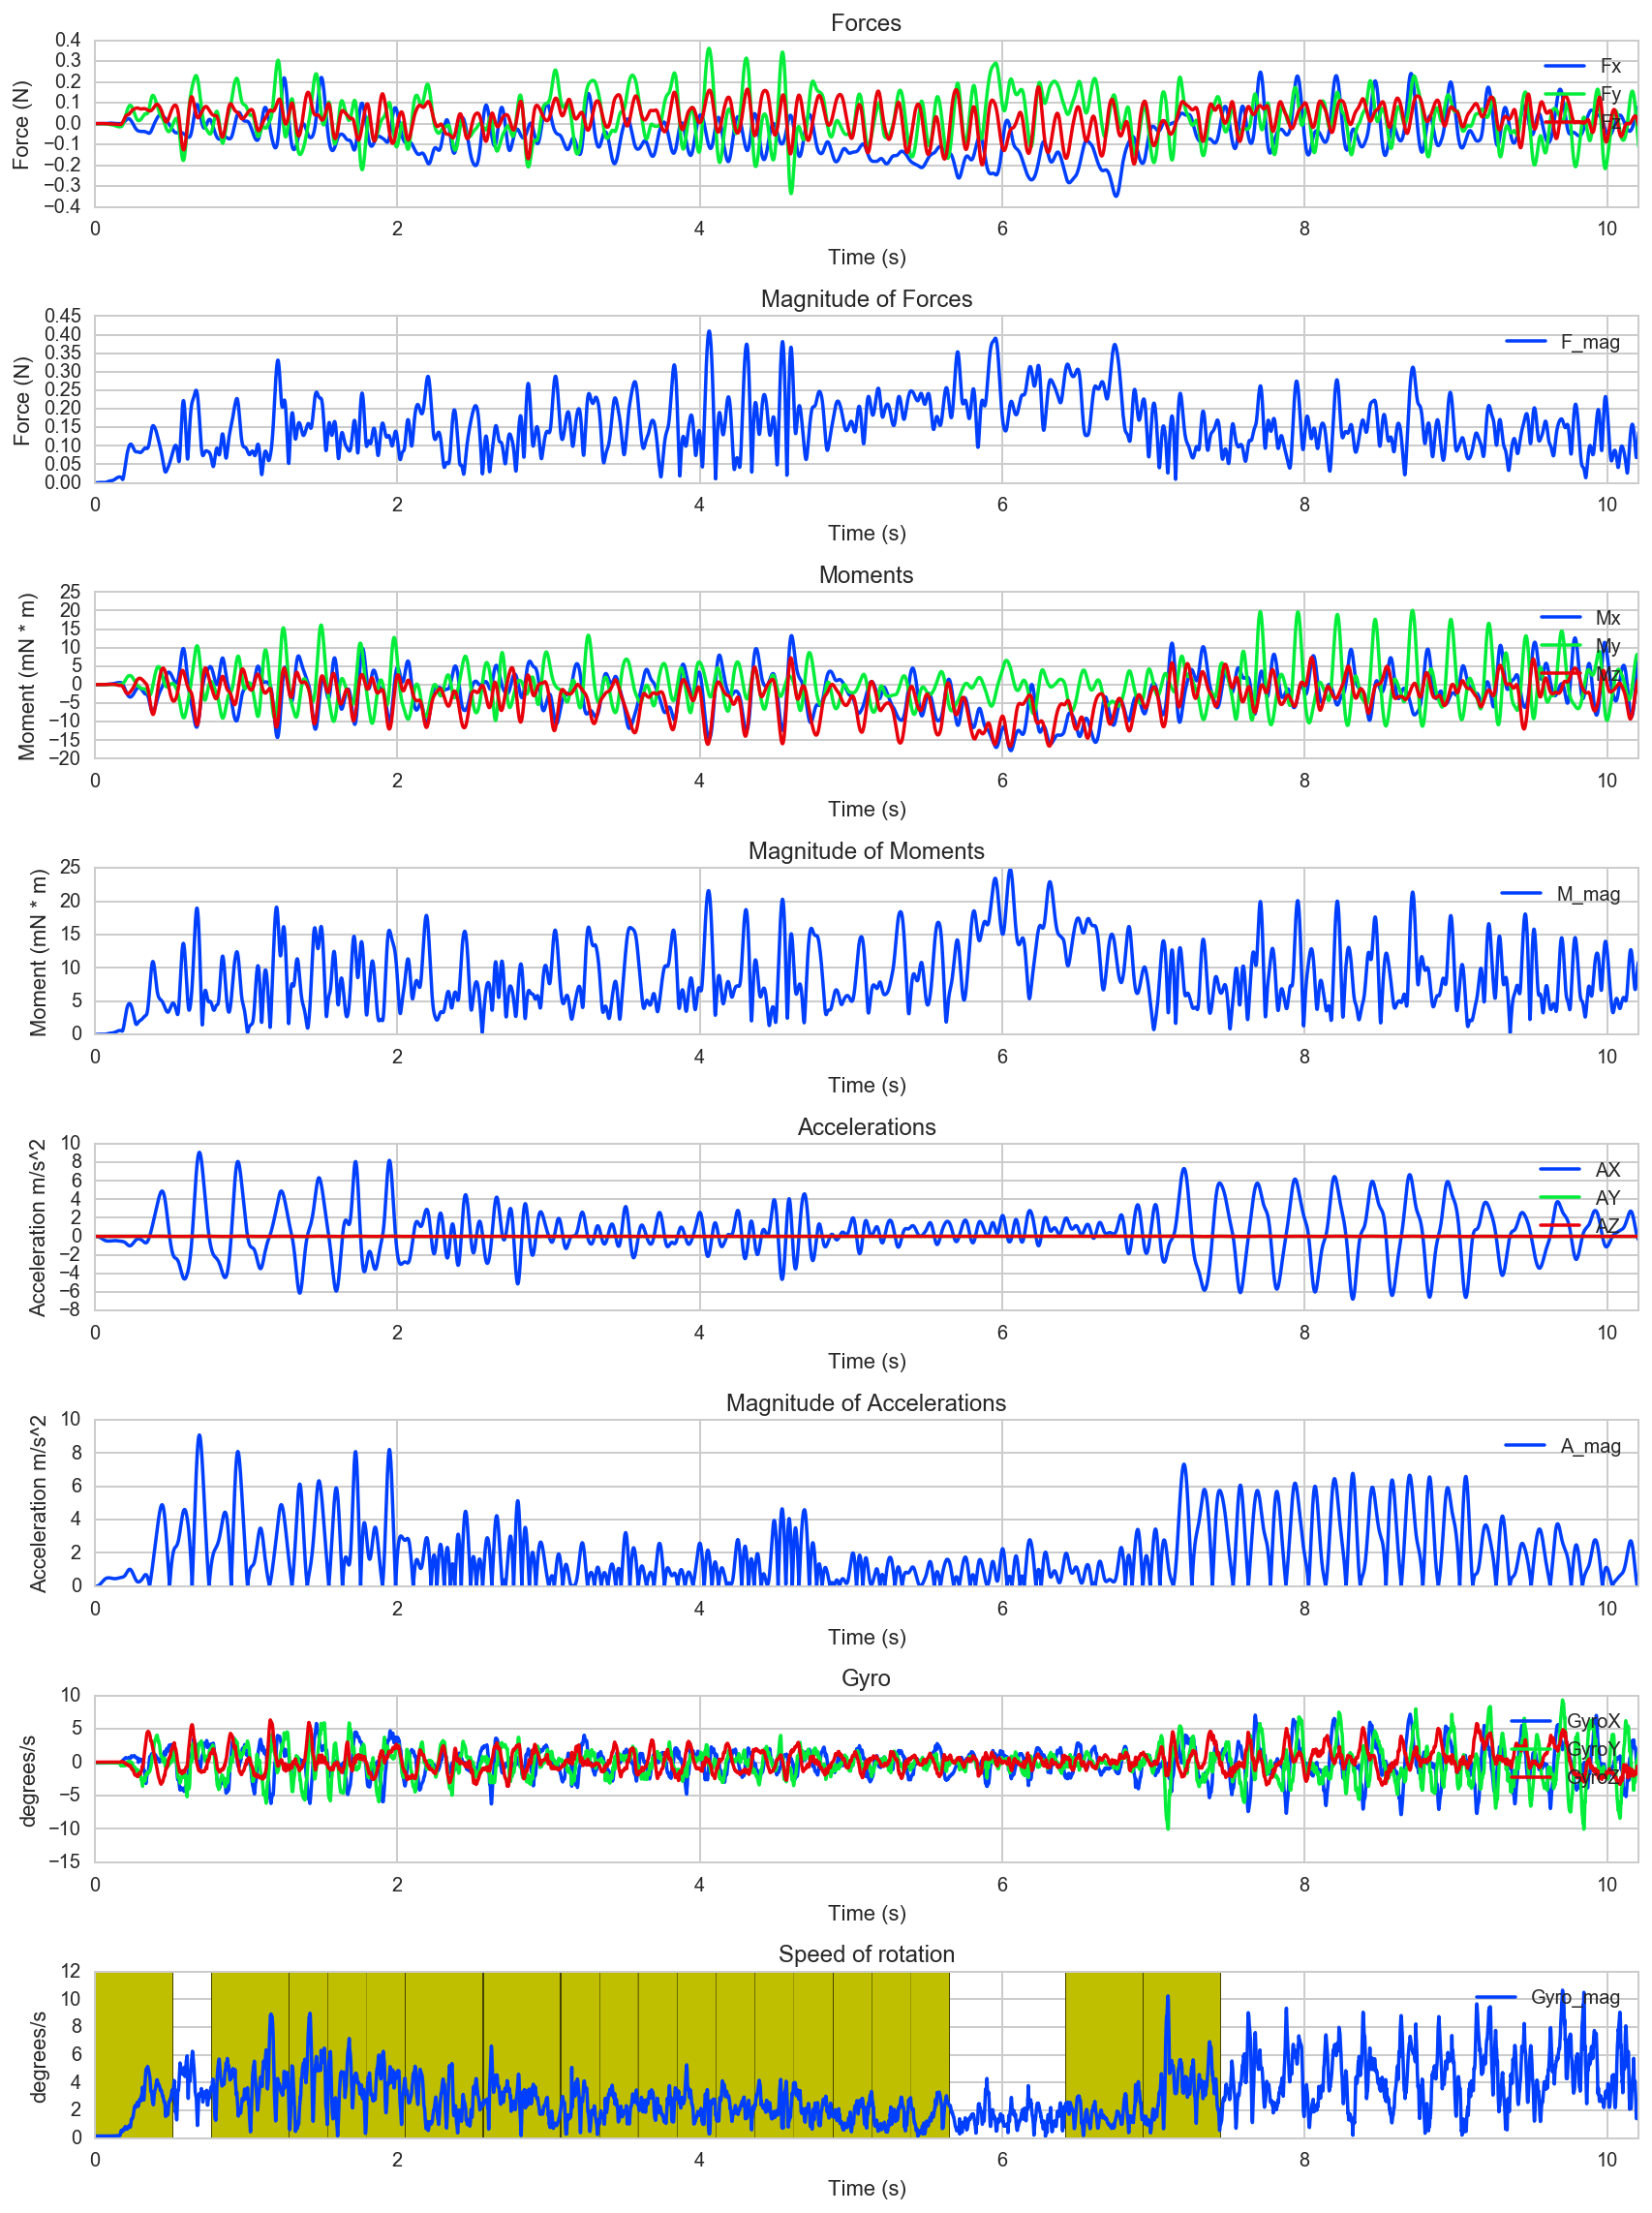

In [4]:
color_intervals = []
for i in xrange(len(df_segs)):
    if random_forest_predictions[i] == 1:
        color_intervals.append((min(df_segs[i]["time"]), max(df_segs[i]["time"])))

print len(color_intervals)
utils.plot_columns(df, [["Fx", "Fy", "Fz"], "F_mag", ["Mx", "My", "Mz"], "M_mag", ["AX", "AY", "AZ"], "A_mag", ["GyroX", "GyroY", "GyroZ"], "Gyro_mag"], display=True, save_figure=False, output_filename="FMAG.png", color_intervals=color_intervals)

In [5]:
# XGB Predictions
test_data = copy.deepcopy(test_data_copy)
xgb_predictions = classify.predict_xgb_trees(test_data)


Running XGB Trees...
CTL size: 117 ACT size: 99
10-fold CV Acc Mean:  0.944134199134 Scores:  [ 0.90909091  1.          0.95454545  1.          0.90909091  0.90909091
  1.          0.95238095  0.85714286  0.95      ]
Feature Importances:
[('Mz_skew', 0.00071038399997504068), ('Fy_kurtosis', 0.0011229599723083959), ('Fz_entropy', 0.0012125458392494733), ('Mx_skew', 0.0013331771362601102), ('Mz_kurtosis', 0.0019329298229975166), ('Fz_skew', 0.0025195249969718718), ('F_mag_kurtosis', 0.0030869716293303886), ('Fy_energy', 0.0031706979106061088), ('Fx_energy', 0.0035081997270777778), ('AX_std', 0.003839981789500319), ('Mz_max', 0.003939982464313584), ('Fx_std', 0.0041645869706291782), ('M_mag_std', 0.0045778634195548836), ('AX_min', 0.0046462904393718054), ('Fy_max', 0.0048803792921343304), ('Fz_kurtosis', 0.0048892701071215818), ('Fy_std', 0.0049440436159319152), ('Mx_std', 0.0049953899525331941), ('AX_mean', 0.005386969743392955), ('Fz_max', 0.005847549298336847), ('My_kurtosis', 0.00598

In [6]:
# SVC Predictions
test_data = copy.deepcopy(test_data_copy)
svc_predictions = classify.predict_svc(test_data)


Running SVC...
CTL size: 117 ACT size: 99
10-fold CV Acc Mean:  0.938701298701 Scores:  [ 0.95454545  1.          0.90909091  1.          0.95454545  0.95454545
  1.          0.85714286  0.85714286  0.9       ]
predicted labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [7]:
# dnn predictions
test_data = copy.deepcopy(test_data_copy)
test_data = np.array(test_data)
print test_data.shape
dnn_predictions = classify.predict_dnn(test_data)

(38, 70)

Running Neural Network...
CTL size: 117 ACT size: 99
Step #1, avg. loss: 1.01618
Step #101, epoch #50, avg. loss: 0.10841
Step #201, epoch #100, avg. loss: 0.01578
Step #301, epoch #150, avg. loss: 0.00603
Step #401, epoch #200, avg. loss: 0.00336
Step #501, epoch #250, avg. loss: 0.00221
Step #601, epoch #300, avg. loss: 0.00161
Step #701, epoch #350, avg. loss: 0.00125
Step #801, epoch #400, avg. loss: 0.00101
Step #901, epoch #450, avg. loss: 0.00084
Step #1, avg. loss: 1.03681
Step #101, epoch #50, avg. loss: 0.12307
Step #201, epoch #100, avg. loss: 0.01941
Step #301, epoch #150, avg. loss: 0.00745
Step #401, epoch #200, avg. loss: 0.00410
Step #501, epoch #250, avg. loss: 0.00269
Step #601, epoch #300, avg. loss: 0.00194
Step #701, epoch #350, avg. loss: 0.00149
Step #801, epoch #400, avg. loss: 0.00120
Step #901, epoch #450, avg. loss: 0.00098
Step #1, avg. loss: 0.99340
Step #101, epoch #50, avg. loss: 0.11380
Step #201, epoch #100, avg. loss: 0.01903
Step #301, epoch

[1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]

[1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]

[1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]
 
 [1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]
 
 [1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]

In [8]:
color_intervals = []
for i in xrange(len(df_segs)):
    if dnn_predictions[i] == 1:
        color_intervals.append((min(df_segs[i]["time"]), max(df_segs[i]["time"])))

print len(color_intervals)

14


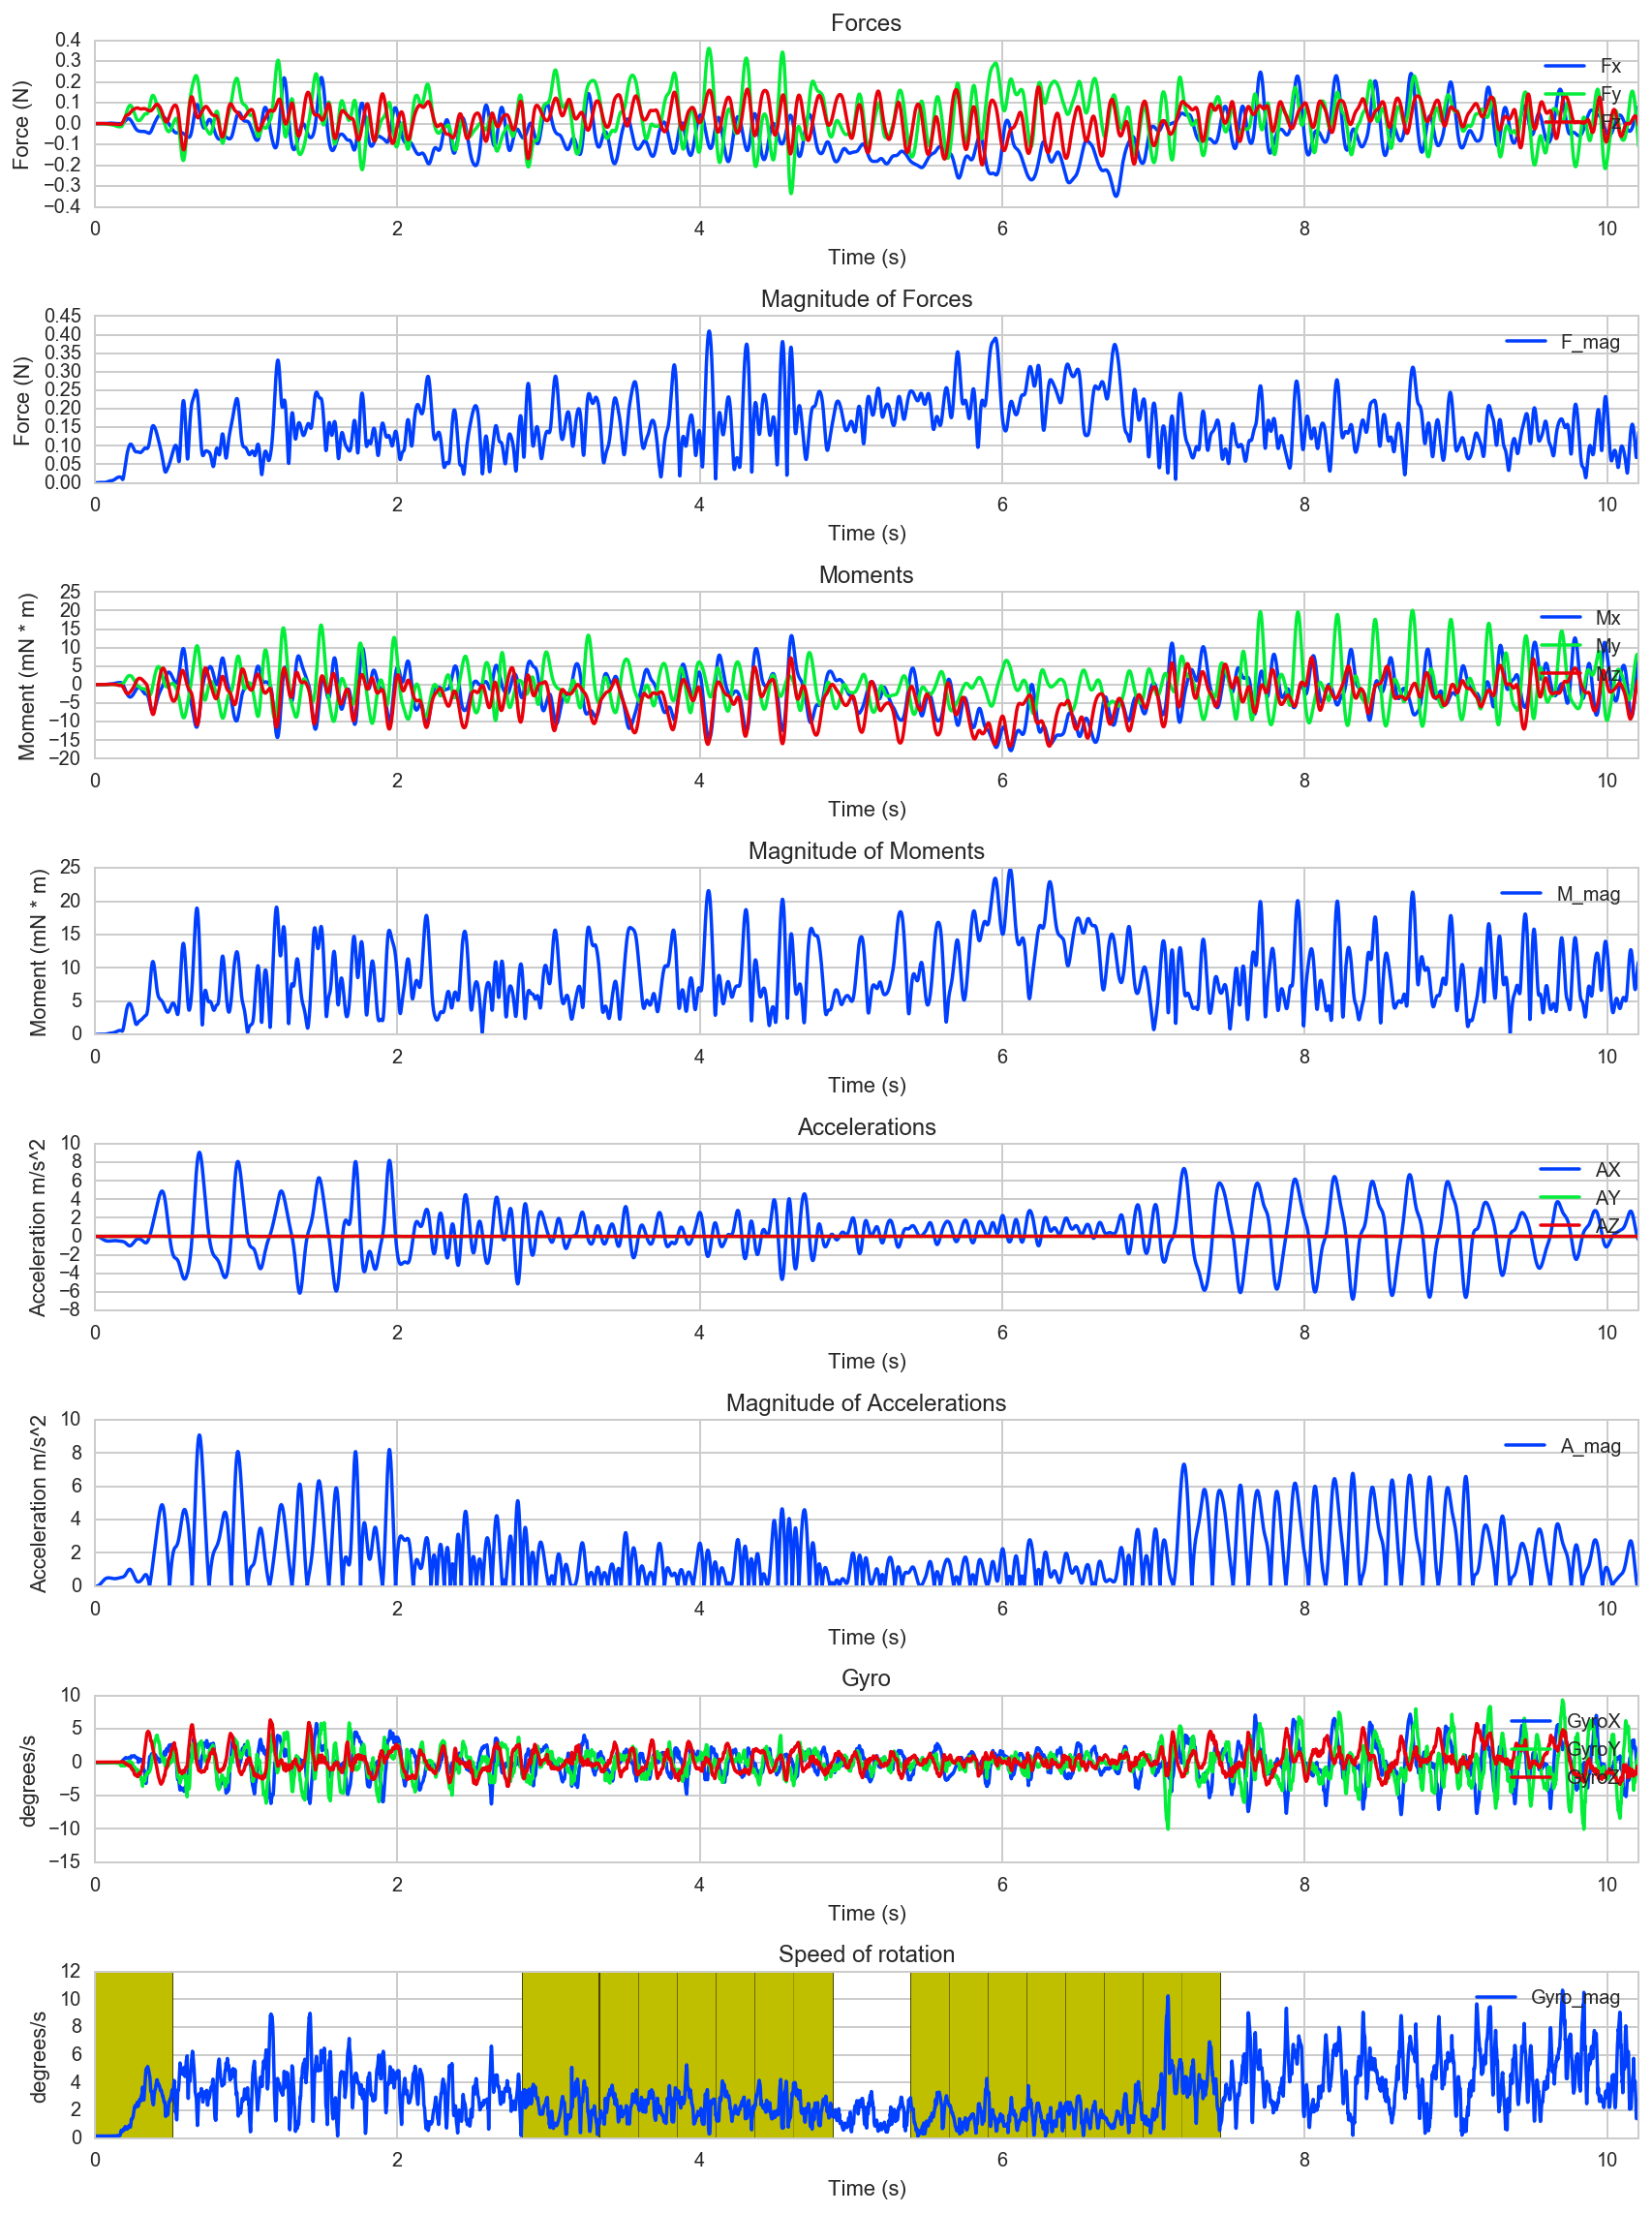

In [9]:
utils.plot_columns(df, [["Fx", "Fy", "Fz"], "F_mag", ["Mx", "My", "Mz"], "M_mag", ["AX", "AY", "AZ"], "A_mag", ["GyroX", "GyroY", "GyroZ"], "Gyro_mag"], display=True, save_figure=False, output_filename="FMAG.png",color_intervals=color_intervals)